In [1]:
import datetime as dt
import yfinance as yf
import pandas as pd

In [2]:
stocks = ['ICICIBANK.NS', 'INFY.NS', 'PAYTM.NS', 'RELIANCE.NS']
start = dt.datetime.today() - dt.timedelta(3650)
end = dt.datetime.today()

cl_price = pd.DataFrame()
ohlcv_data = dict()

In [3]:
for ticker in stocks:
    cl_price[ticker] = yf.download(ticker, start, end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
cl_price

,ICICIBANK.NS,INFY.NS,PAYTM.NS,RELIANCE.NS
Date,,,,
2013-08-05,147.537857,291.204407,NaN,401.926605
2013-08-06,141.636017,289.104401,NaN,392.363037
2013-08-07,141.946640,286.781799,NaN,407.011597
2013-08-08,143.058380,286.897888,NaN,403.839325
2013-08-12,141.750427,290.851257,NaN,394.509003
...,...,...,...,...
2023-07-28,996.200012,1340.500000,762.900024,2527.850098
2023-07-31,998.299988,1355.699951,800.400024,2549.250000
2023-08-01,994.549988,1365.199951,787.200012,2513.199951


In [5]:
cl_price['PAYTM.NS'].isnull().sum()

2040

In [6]:
# filling all the NaN values
without_nan = cl_price.fillna(method=' ', axis=0)
print(without_nan)
## the problem with bfill is that if the last value in the column is nan,
## its value will stay nan because the column ends there.

ValueError: Invalid fill method. Expecting pad (ffill) or backfill (bfill). Got  

In [ ]:
# testing dropna
without_nan = cl_price.dropna(axis=1, how='any')
print(without_nan)

            ICICIBANK.NS
Date                    
2013-08-05    147.537872
2013-08-06    141.636032
2013-08-07    141.946640
2013-08-08    143.058365
2013-08-12    141.750443
...                  ...
2023-07-28    996.200012
2023-07-31    998.299988
2023-08-01    994.549988
2023-08-02    986.950012
2023-08-03    964.000000

[2465 rows x 1 columns]


In [7]:
print(cl_price.mean())
print(cl_price.std())
print(cl_price.median())
print(cl_price.describe())
print(cl_price.tail())
print(cl_price.pct_change())

ICICIBANK.NS     417.785401
INFY.NS          758.262593
PAYTM.NS         750.962469
RELIANCE.NS     1247.962278
dtype: float64
ICICIBANK.NS    231.679264
INFY.NS         450.115696
PAYTM.NS        254.738821
RELIANCE.NS     799.035728
dtype: float64
ICICIBANK.NS     312.760315
INFY.NS          567.178772
PAYTM.NS         675.950012
RELIANCE.NS     1042.576416
dtype: float64
       ICICIBANK.NS      INFY.NS     PAYTM.NS  RELIANCE.NS
count   2465.000000  2465.000000   425.000000  2465.000000
mean     417.785401   758.262593   750.962469  1247.962278
std      231.679264   450.115696   254.738821   799.035728
min      128.099396   286.336609   441.100006   365.561707
25%      245.954773   416.374390   608.250000   478.778290
50%      312.760315   567.178772   675.950012  1042.576416
75%      561.179382  1206.802124   797.200012  2068.945312
max      998.299988  1848.383057  1798.750000  2841.850098
            ICICIBANK.NS      INFY.NS    PAYTM.NS  RELIANCE.NS
Date                         

In [8]:
daily_returns = cl_price.pct_change()

In [9]:
print(cl_price)
print(cl_price.shift(1))
print(cl_price/cl_price.shift(1))

            ICICIBANK.NS      INFY.NS    PAYTM.NS  RELIANCE.NS
Date                                                          
2013-08-05    147.537857   291.204407         NaN   401.926605
2013-08-06    141.636017   289.104401         NaN   392.363037
2013-08-07    141.946640   286.781799         NaN   407.011597
2013-08-08    143.058380   286.897888         NaN   403.839325
2013-08-12    141.750427   290.851257         NaN   394.509003
...                  ...          ...         ...          ...
2023-07-28    996.200012  1340.500000  762.900024  2527.850098
2023-07-31    998.299988  1355.699951  800.400024  2549.250000
2023-08-01    994.549988  1365.199951  787.200012  2513.199951
2023-08-02    986.950012  1356.849976  776.099976  2486.350098
2023-08-03    965.000000  1364.300049  767.599976  2475.899902

[2465 rows x 4 columns]
            ICICIBANK.NS      INFY.NS    PAYTM.NS  RELIANCE.NS
Date                                                          
2013-08-05           NaN      

In [10]:
daily_returns.mean()

ICICIBANK.NS    0.000980
INFY.NS         0.000770
PAYTM.NS       -0.001101
RELIANCE.NS     0.000898
dtype: float64

In [28]:
moving_avg = daily_returns.rolling(window=10).mean()

In [29]:
exp_moving_avg = daily_returns.ewm(com=10, min_periods=10).mean()

In [18]:
import matplotlib

array([[<Axes: xlabel='Date'>, <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>]], dtype=object)

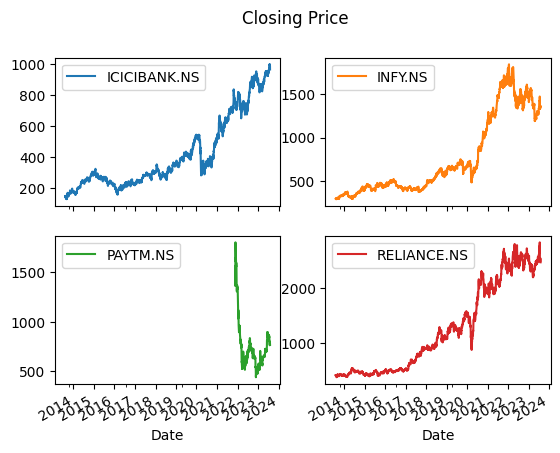

In [33]:
cl_price.plot(subplots=True, layout=(2,2), title="Closing Price")

<Axes: xlabel='Date'>

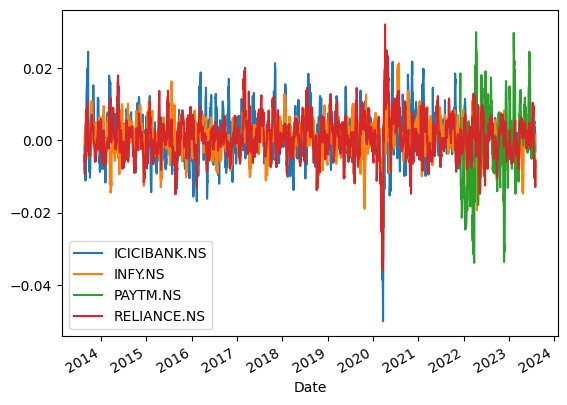

In [31]:
moving_avg.plot()

<Axes: xlabel='Date'>

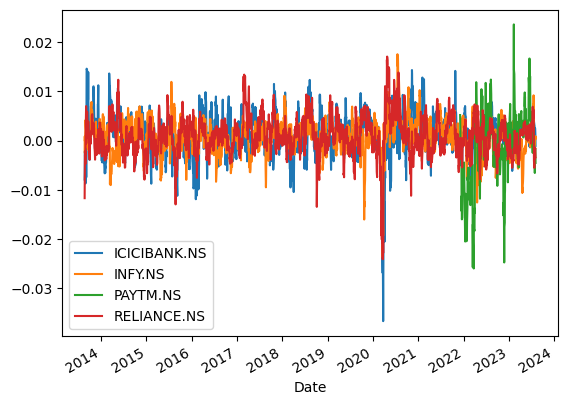

In [32]:
exp_moving_avg.plot()

<Axes: xlabel='Date'>

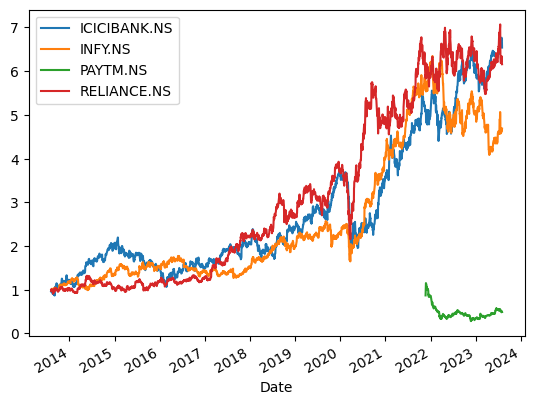

In [34]:
(daily_returns+1).cumprod().plot()

In [35]:
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

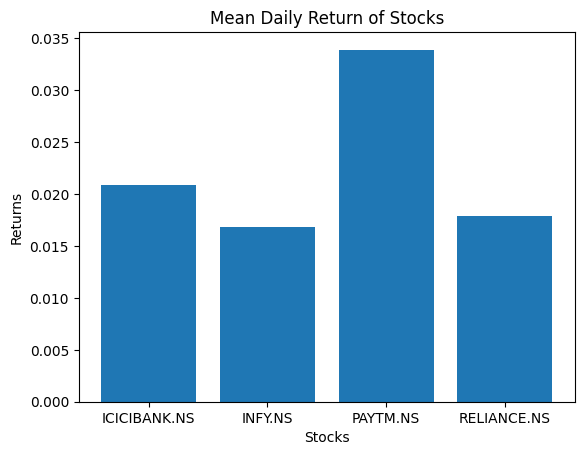

In [38]:
fig, ax = plt.subplots()

ax.set(title="Mean Daily Return of Stocks", xlabel="Stocks", ylabel="Returns")
# plt.bar(x=daily_returns.columns, height=daily_returns.mean())
plt.bar(x=daily_returns.columns, height=daily_returns.std())
